Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as any collaborators you worked with:

In [1]:
COLLABORATORS = "me myself and I lol"

---

In [2]:
from __future__ import print_function
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

# import the factorial function from scipy
from scipy.special import factorial

# HW 1:  Forms of Error



## Question 1:  definition of errors

**(a)**  [4 pts] Write a short python program to calculate and return, the absolute error, relative error and degree of decimal precision (as defined in class) given an object `f` and its approximation `F`.  Note, both `f` and `F` can be numpy arrays.

In [3]:
def errors(f,F):
    """ calculate various measures of error of an object f and its approximation F
    
    Parameters
    ----------
    f:  numpy.array (or float)
        array of true values
        
    F: numpy.array
        array of approximate values
        
    Returns
    -------
    
    e: array of absolute errors
    r: array of relative errors
    p: integer array of precisions
    """
    
    f = numpy.asarray(f)
    F = numpy.asarray(F)
    e,r,p = numpy.array([]),numpy.array([]),numpy.array([])
    
    if f.ndim == 0:
        e = numpy.abs(f - F)
        r = e / numpy.abs(f)
        p = int(-numpy.log10(r/5.))
    
    else:
        for (f,F) in zip(f,F):
            e = numpy.append(e,numpy.abs(f - F)) 
            r = numpy.append(r,numpy.abs(f - F) / numpy.abs(f))
            p = numpy.append(p,int(-numpy.log10(numpy.abs(f - F) / numpy.abs(f) / 5.)))
    

#     # YOUR CODE HERE
#     raise NotImplementedError()
    return e, r, p


In [4]:
x = [1., 2., 3.]
f = numpy.exp(x)
F = [ 2.718,  7.389,  20.085]
e,r,p = errors(f,F)
print(e,r,p)

[2.81828459e-04 5.60989307e-05 5.36923188e-04] [1.03678896e-04 7.59216467e-06 2.67318315e-05] [4. 5. 5.]


In [5]:
# Testing Cell (do not copy)

# Test Simple Scalars
e,r,p = errors(numpy.exp(1),2.72)
answer = [0.0017181715409551046, 0.0006320799863232398, 3]
numpy.testing.assert_allclose([e,r,p], answer)
print('passed scalar test')

# Test with array input
x = [1., 2., 3.]
f = numpy.exp(x)
F = [ 2.718,  7.389,  20.085]
e,r,p = errors(f,F)
numpy.testing.assert_allclose(e,[2.81828459e-04, 5.60989307e-05, 5.36923188e-04])
numpy.testing.assert_allclose(r,[1.03678896e-04, 7.59216467e-06, 2.67318315e-05])
numpy.testing.assert_allclose(p,[4, 5, 5])
print('passed array test')

passed scalar test
passed array test


**(b)** [2 pts]  Use your routine to compare the absolute error, relative error and degree of precision for these two rational approximations of $\pi$

* $f = \pi$ and $F = 22 / 7$
* $f = \pi$ and $F = 355 / 113$

Which is more accurate?

In [6]:
f = numpy.pi
F = 22 / 7
e,r,p = errors(f,F)
print(e,r,p)

f = numpy.pi
F = 355 / 113
e,r,p = errors(f,F)
print(e,r,p)


0.0012644892673496777 0.0004024994347707008 4
2.667641894049666e-07 8.49136787674061e-08 7


The second pair is more accurate, because the degree of precision of it is 7 and the first one is only 4\
Also, it has less absolute and relative error than the second one
* $f = \pi$ and $F = 355 / 113$

**(c)** [6 pts] Write a python routine to find the most accurate $d$ digit rational approximation to $\pi$. i.e. find
two $d$ digit positive integers $m,n$ such that 

$$ F = \frac{m}{n} \sim \pi$$

(hint:  $355/113$ is the best 3-digit rational approximation)

In [7]:
def rational_pi(d):
    ''' Find the best rational approximation to pi ~ m/n where m and n are both d-digit positive integers
    
    Parameters
    ----------
    
    d: int
        number of digits in both m and n
    
    Returns
    -------
    m,n: int
        numerator and denominator of best d digit rational approximation to pi ~ m/n
        
    '''
    e = numpy.pi
    m = 0
    n = 0
    
    if d != 0:    
        for n_current in range(int(numpy.floor(10**d / numpy.pi)),int(10**(d - 1)) - 1,-1):
            m_floor = int(numpy.floor(n_current * numpy.pi))
            m_ceil = int(numpy.ceil(n_current * numpy.pi))
            e_floor, r_floor, p_floor = errors(numpy.pi, m_floor / n_current)
            e_ceil, r_ceil, p_ceil = errors(numpy.pi, m_ceil / n_current)
            
            if e_floor > e_ceil:
                if e_ceil > e:
                    pass
                
                else:
                    e = e_ceil
                    m = m_ceil
                    n = n_current
                    
            else:
                if e_floor > e:
                    pass
                
                else:
                    e = e_floor
                    m = m_floor
                    n = n_current
            
    else:
        pass
    
    return m,n
    
#     # YOUR CODE HERE
#     raise NotImplementedError()

In [8]:
# Testing Cell (do not copy)

# print out best rational approximations and their errors  for d =1-5
for d in range(1,6):
    m,n = rational_pi(d)
    e,r,p = errors(numpy.pi,m/n)
    print('d={}: {}/{} = {}:\t e = {},\t, r = {},\t p= {}'.format(d,m,n,m/n,e,r,p))
    
# Run assertion Tests
numpy.testing.assert_allclose(rational_pi(2),(44, 14))
numpy.testing.assert_allclose(rational_pi(3),(355, 113))
print('\nsuccess!')


d=1: 3/1 = 3.0:	 e = 0.14159265358979312,	, r = 0.04507034144862795,	 p= 2
d=2: 44/14 = 3.142857142857143:	 e = 0.0012644892673496777,	, r = 0.0004024994347707008,	 p= 4
d=3: 355/113 = 3.1415929203539825:	 e = 2.667641894049666e-07,	, r = 8.49136787674061e-08,	 p= 7
d=4: 3195/1017 = 3.1415929203539825:	 e = 2.667641894049666e-07,	, r = 8.49136787674061e-08,	 p= 7
d=5: 99733/31746 = 3.1415926415926414:	 e = 1.1997151716514054e-08,	, r = 3.818811997413258e-09,	 p= 9

success!


**(d)** [6 pts] $F = n \log(n) - n$ is Stirling's approximation to  $f = \log(n!)$ for large values of $n$. 
Do the following

* Make a plot showing the relative error and degree of decimal precision for $f$ and $F$ as a function of integer $n$

* Estimate the smallest value of $n$ where Stirling's approximation is good to 4 decimal places of precision.  

**Note**: If you use the `factorial` function imported from `scipy.special`, you will not be able to answer this question.  **Why?**  

**Hint**: However there is another way to evaluate $\log(n!)$ for integer $n$ that will work.

1452


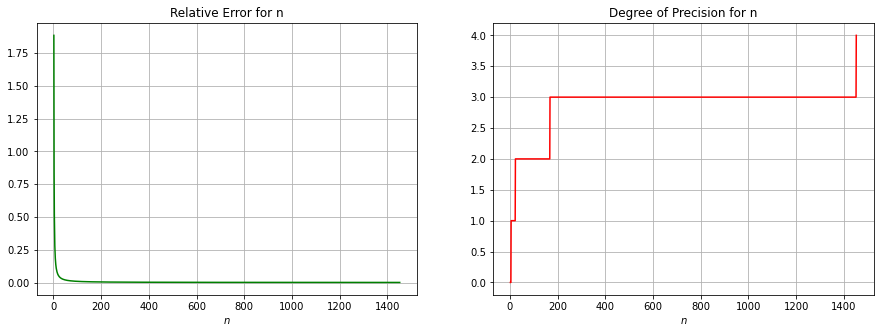

In [9]:
n = 2
f = 0
x = []
y_error = []
y_precision = []


while True:
    F = n * numpy.log(n) - n
    f += numpy.log(n)
    
    e,r,p = errors(f,F)
    
    x.append(n)
    y_error.append(r)
    y_precision.append(p)
    
    if r < 5 * 10 ** -4:
        print(n)
        break;
        
    n += 1

fig = plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(x,y_error,'g',label='Relative Error')
plt.xlabel("$n$")
plt.title("Relative Error for n")
plt.grid()

plt.subplot(1,2,2)
plt.plot(x,y_precision,'r',label='Degree of Precision')
plt.xlabel("$n$")
plt.title("Degree of Precision for n")
plt.grid()

plt.show()


# # YOUR CODE HERE
# raise NotImplementedError()


$$
n = 1452
$$

the reason why I cannot solve this problem by using fractorial imported from ``scipy.special`` is:

n is such a large number and the factorial cannot be calculated directly and easily.

## Question 2

[4 pts] Given the Taylor polynomial expansions of two functions around $x=0$

$$\frac{1}{1-\Delta x} = 1 + \Delta x + \Delta x^2 + \Delta x^3 + O(\Delta x^4)$$

and

$$\cosh \Delta x = 1 + \frac{\Delta x^2}{2!} + \frac{\Delta x^4}{4!} + O(\Delta x^6)$$

calculate their sum and product as well as the order of approximation for the truncation error (i.e. determine the exponent that belongs in the $O$).


**Answer to Question 2**

Set expansion below as the expanded form of $T_{N1}(x)$ for $N=3$ around $x_0 = 0$

$$\frac{1}{1-\Delta x} = 1 + \Delta x + \Delta x^2 + \Delta x^3 + O(\Delta x^4)$$ 

Set expansion below as the expanded form of $T_{N2}(x)$ for $N=2$ around $x_0 = 0$

$$\cosh \Delta x = 1 + \frac{\Delta x^2}{2!} + \frac{\Delta x^4}{4!} + O(\Delta x^6)$$ 

So, from this two expansions we can easily know $T_{N1}(x)$ should be $$\sum^N_{n=0} \Delta x^{n}$$
$T_{N2}(x)$ should be $$\sum^N_{n=0} \frac{\Delta x^{2n}}{2n!}$$

- **Sum** 

$$T_{Nsum}(x) = \sum^N_{n=0} \Delta x^{n} + \sum^N_{n=0} \frac{\Delta x^{2n}}{2n!}
              = \sum^N_{n=0} (\Delta x^{n} + \frac{\Delta x^{2n}}{2n!})\\
              = 1 + \Delta x + \Delta x^2 + \Delta x^3 + 1 + \frac{\Delta x^2}{2!} + \frac{\Delta x^4}{4!} + O(\Delta x^4)\\
              = 2+\Delta x +\frac{3 \Delta x^2}{2}+  \Delta x^3 +O(\Delta x^4)
              $$

Since $\Delta x^4$ and $\Delta x^6$ are both small values, so the exponent that belongs in the $O$ should be $\Delta x^4$, because the order k should be the minimum of (4,6), which should be 4


- **Product**

$$T_{Nproduct}(x) = \sum^N_{n=0} \Delta x^{n} * \sum^N_{n=0} \frac{\Delta x^{2n}}{2n!}\\
              = 1 * (1 + \Delta x + \Delta x^2 + \Delta x^3) + \frac{\Delta x^2}{2!} * (1 + \Delta x + \Delta x^2 + \Delta x^3) + \frac{\Delta x^4}{4!} * (1 + \Delta x + \Delta x^2 + \Delta x^3) + O(\Delta x^6) * (1 + \Delta x + \Delta x^2 + \Delta x^3) + O(\Delta x^4) * (1 + \frac{\Delta x^2}{2!} + \frac{\Delta x^4}{4!}) + O(\Delta x^{6 + 4})\\
              =1 * (1 + \Delta x + \Delta x^2 + \Delta x^3) + \frac{\Delta x^2}{2!} * (1 + \Delta x + \Delta x^2 + \Delta x^3) + \frac{\Delta x^4}{4!} * (1 + \Delta x + \Delta x^2 + \Delta x^3) + O(\Delta x^4)\\
              = 1 + \Delta x + \frac{3 \Delta x^2}{2} + \frac{3 \Delta x^3}{2} + O(\Delta x^4)
$$
the exponent that belongs in the $O$ should be $\Delta x^{4}$, which means the order equals to 4


## Question 3:  The great Exp challenge...

Here you will attempt to write a function to calculate $e^x$ using its Taylor polynomial approximation expanded around $x_0=0$

$$e^x \approx T_n(x) = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \cdots + \frac{x^n}{n!}$$

such that the relative error of $f=e^x$ and $F=T_n(x)$ is of order Machine epsilon ($\epsilon_{machine}$) for  $x\in[-50,50]$.  This problem is actually a bit of a stinker and takes a bit of thought (particularly for $x<0$).  But I'll work you through it.

**(a)** [4 pts] Assume $x> 0$ and show that the upper bound on the *relative error*  at term $n$ 

$$r_n = \frac{|e^x - T_n(x)|}{|e^x|}$$

is given by

$$r_n \leq \left | \frac{x^{n+1}}{(n + 1)!} \right |$$

**Answer to Question 3 (a)**

Since $f=e^x$ and $F=T_N(x)$, by applying **Discretization Error of Taylor's Theorem**, $R_N(x)$ can be written as $\frac{f^{(n+1)}(c) \cdot (x - x_0)^{n+1}}{(n+1)!}$.\
Then, $T_N(x)$ can be written as $T_N(x)=f(x)-R_N(x)=e^x-\frac{f^{(N+1)}(c) \cdot (x - x_0)^{n+1}}{(n+1)!}$\
$r_n$ then can be written as $r_n = \frac{|e^x - T_n(x)|}{|e^x|} =\frac{|e^{(N+1)}(c) \cdot (x - x_0)^{n+1}|}{|e^x(n+1)!|} $\
Since $0\leq c\leq x$, $e^c\leq e^x$, $r_n = \frac{|e^{(N+1)}(c) \cdot (x - x_0)^{n+1}|}{|e^x(n+1)!|}   \leq \left | \frac{x^{n+1}}{(n + 1)!} \right | (x_0 = 0)$

**(b)** [4 pts] Analytically show that for **large** $x\gg1$ and $n$, $r_n \leq \epsilon_{\text{machine}}$ implies that we need *approximately* $n > e \cdot x$ terms in the series (where $e = \text{exp}(1)$).

*Hint* Use Stirling's approximation $log (n!) \approx n~log~n - n$ (and then this problem is still a bit tricky)

**Answer to Question 3(b)**

According to $r_n \leq \epsilon_{machine}$, we can have something below:

$$
\frac{x^{n+1}}{(n+1)!} \leq \epsilon_{machine}
$$

Since $\epsilon_{machine}$ is a super small number, we then can eliminate it and change $\leq$ to $<$

$$
x^{n+1}<(n+1)!
$$

Apply $log$ on both sides:

$$
(n+1)log(x) < (n+1)log(n+1)-(n+1)
$$
$$
log(x) < log(n+1) - 1
$$
$$
log(x) + 1 <log(n+1)
$$
$$
log(x) + log(e) < log(n+1)
$$

For large values of $n$, $log(n+1) = log(n)$:
$$
log(x) + log(e) < log(n)
$$
$$
log(e \cdot x) < log(n)
$$
$$
n > e \cdot x
$$

**(c)** [6 pts] Use this result to write a Python function that accurately approximates $e^x$ using $T_n(x)$ for scalar $x$ and returns both the estimate and the number of terms in the series.  Note that the testing tolerance will be $8 \cdot \epsilon_{\text{machine}}$ over the range $x\in[-50,50]$

Make sure to document your code including expected inputs, outputs, and assumptions being made.

Some Hints:
* To make your life easier,  we will assume $x$ and $T_n(x)$ are just of type float (not arrays)
* Think about how we evaluated polynomials efficiently in class
* $T_n(x)$ for $x<0$ is a highly unstable alternating series with severe cancellation issues. However, there is a simple fix that will return accurate solutions independent of the sign of $x$

In [10]:
def Tn_exp(x):
    """ Write a decent description here
    
    Parameters:
    -----------
        x: float
            scalar value to approximate exp(x)
    """

    assert(isinstance(x,float))
    eps = numpy.finfo(float).eps
      
    use_inv = False
    if x<0:
        x = abs(x) 
        use_inv = True
    
    n = 1

    while True:
        
        MAX_N = int(numpy.ceil(numpy.exp(1) * x)) + n
        p = []

        for n in range(MAX_N + 1):
            p.append(1 / factorial(n)) 
        p.reverse()    

        Tn = p[0]

        for coefficient in p[1:]:
            Tn = Tn * x + coefficient

        if use_inv:
            Tn = 1/Tn
            r = numpy.abs((numpy.exp(-x) - Tn) / numpy.exp(-x))

        else:
            r = numpy.abs((numpy.exp(x) - Tn) / numpy.exp(x))


        if r < (8.0 * eps):
            break
        
        n += 1
    

#     # YOUR CODE HERE
#     raise NotImplementedError()


    return Tn, MAX_N

In [11]:
def Tn_exp(x):
    """ Write a decent description here
    
    Parameters:
    -----------
        x: float
            scalar value to approximate exp(x)
    """

    assert(isinstance(x,float))
    eps = numpy.finfo(float).eps
    
    T_n = 1.0
    MAX_N = int(2000 + int(abs(x) * 3))
    
    use_inv = False
    if x<0:
        x = abs(x) 
        use_inv = True
    
    for n in numpy.arange(MAX_N,0,-1):
        T_n = T_n * x / n + 1.
    
    if use_inv:
        T_n = 1.0/T_n
    
    Tn = T_n

    return Tn, MAX_N

In [12]:
# Feel free to test your code here and/or make a plot of errors

x = numpy.linspace(-50, 50, 101)
eps = numpy.finfo(float).eps

answer = numpy.zeros(x.shape)
N = numpy.zeros(x.shape)
for i,xi in enumerate(x):
    answer[i], N[i] = Tn_exp(xi)

r = numpy.abs(answer - numpy.exp(x)) / numpy.abs(numpy.exp(x))


In [13]:
# Testing Cell (do not copy)

x = numpy.linspace(-50, 50, 101)
eps = numpy.finfo(float).eps
tolerance = 8 * eps

answer = numpy.zeros(x.shape)
N = numpy.zeros(x.shape)
for i,xi in enumerate(x):
    answer[i], N[i] = Tn_exp(xi)
r = numpy.abs(answer - numpy.exp(x)) / numpy.abs(numpy.exp(x))
print('maxmimum relative error = {} eps_machine'.format(r.max()/eps))
assert(numpy.all(r  < tolerance))
print("Success!")

maxmimum relative error = 3.10808965332734 eps_machine
Success!


**(d)** [4 pts] In ieee double precision,  the largest value of $x$ that has $e^x<$ `numpy.finfo(float).max` is about 709 (i.e. `numpy.log(numpy.finfo(float).max))`. 

* What is the relative error in units of machine epsilon for your routine and `f=numpy.exp(709)`
* What is the relative error in units of machine epsilon for `F=numpy.exp(1)**709` and `f=numpy.exp(709)`

Explain your results

I wrote 2 piece of codes to generate the Tn and MAX_N
The first one will find the Tn and MAX_N automatically starting from MAX_N = 1 and return the right answer.
The second one also will do that but start from a prescribed MAX_N to 0 to get the right answer.
Since the fisrt one will take so long on finding the right number of term of $709$, so I used the second one to get the answer to this question (d)

Relative Error is: 11.483841610648803 machine epsilons.\
Relative Error is: 170.0702257577037 machine epsilons.

Explaination:
the reason why my routine's answer ss relatively smaller than `F=numpy.exp(1)**709` is I made the code find the term by itself. The reason why `F=numpy.exp(1)**709` is so large is $e \times e ... \times e$ for like 709 times will generate super great machine epsilon since the computer cannot represent $e \times e ...$ exactly the same as the real $e^{709}$


In [14]:
f = numpy.exp(709)
F = Tn_exp(709.)[0]

rel_error = abs(f-F)/abs(f)
print("Relative Error is:",rel_error/eps,"machine epsilons.")

f = numpy.exp(709)
F = numpy.exp(1)**709

rel_error2 = abs(f - F) / abs(f)
print("Relative Error is:",rel_error2/eps, "machine epsilons.")



Relative Error is: 11.483841610648803 machine epsilons.
Relative Error is: 170.0702257577037 machine epsilons.


**(e)** **Extra Credit**

[4 pts] Can you modify your routine for `Tn_exp(x)`) to approximate $e^x$ on the range $x\in[-709, 709]$ to within 16 $\epsilon_{machine}$?


In [19]:
def Tn_exp(x,tolerance):
    """ Write a decent description here
    
    Parameters:
    -----------
        x: float
            scalar value to approximate exp(x)
    """

    assert(isinstance(x,float))
    eps = numpy.finfo(float).eps
    
    T_n = 1.0
    MAX_N = int(20 + int(abs(x) * 3))
    
    use_inv = False
    if x<0:
        x = abs(x) 
        use_inv = True
    
    for n in numpy.arange(MAX_N,0,-1):
        T_n = T_n * x / n + 1.
    
    if use_inv:
        T_n = 1.0/T_n
    
    Tn = T_n
#         r = numpy.abs((numpy.exp(-x) - Tn) / numpy.exp(-x))
#     else:
#         r = numpy.abs((numpy.exp(x) - Tn) / numpy.exp(x))
    
#     while True:
        
#         MAX_N = int(numpy.ceil(numpy.exp(1) * x)) + n
#         p = []

#         for n in range(MAX_N + 1):
#             p.append(1 / factorial(n)) 
#         p.reverse()    

#         Tn = p[0]

#         for coefficient in p[1:]:
#             Tn = Tn * x + coefficient

#         if use_inv:
#             Tn = 1/Tn
#             r = numpy.abs((numpy.exp(-x) - Tn) / numpy.exp(-x))

#         else:
#             r = numpy.abs((numpy.exp(x) - Tn) / numpy.exp(x))

#         if r < tolerance:
#             break
        
#         n += 1
    
    

#     # YOUR CODE HERE
#     raise NotImplementedError()


    return Tn, MAX_N

In [20]:
x = numpy.linspace(-709, 709, 101)
tolerance = 16 * eps

answer = numpy.zeros(x.shape)
N = numpy.zeros(x.shape)
for i,xi in enumerate(x):
    answer[i], N[i] = Tn_exp(xi, tolerance=tolerance)
r = numpy.abs(answer - numpy.exp(x)) / numpy.abs(numpy.exp(x))
print('maxmimum relative error = {} eps_machine'.format(r.max()/eps))
assert(numpy.all(r  < tolerance))
print("Success!")

maxmimum relative error = 14.198921216203827 eps_machine
Success!


In [21]:
x = numpy.linspace(-709, 709, 101)
tolerance = 16 * eps

answer = numpy.zeros(x.shape)
N = numpy.zeros(x.shape)
for i,xi in enumerate(x):
    answer[i], N[i] = Tn_exp(xi, tolerance=tolerance)
r = numpy.abs(answer - numpy.exp(x)) / numpy.abs(numpy.exp(x))
print('maxmimum relative error = {} eps_machine'.format(r.max()/eps))
assert(numpy.all(r  < tolerance))
print("Success!")

maxmimum relative error = 14.198921216203827 eps_machine
Success!


## Question 4

Consider a computing system that uses deoxyribonucleic acid (DNA) to store information.  Given that DNA is formed from the 4 nucleobases adenine, cytosine, guanine, and thymine (uracil is only found in RNA) let us assume that our storage of numbers will be base 4.  Answer the following questions based on this assuming that we have $p=3$ for the mantissa and the exponent $E \in [-3, 3]$ (and we'll pretend DNA has a sign bit...chirality?).

**(a)** [4 pts] How many numbers can we represent with this floating point system (assume it's normalized)?  What are the underflow and overflow limits? What is machine Epsilon?

Since our storage of numbers will be base 4, Mantissa equals to 3 and exponent is from -3 to 3, our number should firstly be a quaternary number that has a form of $-1^{S} \times M \times Base^{E} = \pm d_1 . d_2 d_3 d_4 \ldots d_p \times Base^E$\
After substituting the given info in this form, we can get the range of this floating point system: $ \pm (3 \times 4^{-3}... 3 \times 4^{3})$\
So the total number of this chiral floating point system is: $2 \times 3 \times 4 \times 4 \times 7 + 1 = 673$\
The underflow limit is: $ -1.00 \times 4^{-3} = -0.015625$\
The overflow limit is: $3.33 \times 4^{3} = 192$

**(b)** [4pts] Graphically show how the numbers on the decimal real line are distributed.

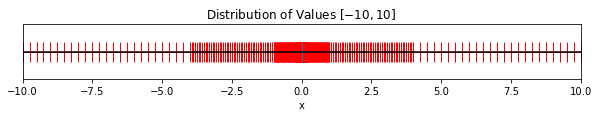

In [18]:
d_1_values = [1,2,3]
d_2_values = [0,1,2,3]
d_3_values = [0,1,2,3]
E_values = [3,2,1,0,-1,-2,-3]

fig = plt.figure(figsize=(10.0, 1.0))


for E in E_values:
    for d1 in d_1_values:
        for d2 in d_2_values:
            for d3 in d_3_values:
                plt.plot( (d1 + d2 * 4 ** (-1) + d3 * 4 ** (-2)) * 4**E, 0.0, 'r+', markersize=20)
                plt.plot(-(d1 + d2 * 4 ** (-1) + d3 * 4 ** (-2)) * 4**E, 0.0, 'r+', markersize=20)
            
plt.plot(0.0, 0.0, '+', markersize=20)
plt.plot([-10, 10], [0.0, 0.0], 'k')

plt.title("Distribution of Values $[-10,10]$")
plt.yticks([])
plt.xlabel("x")
plt.ylabel("")
plt.xlim([-10,10])
plt.show()


# YOUR CODE HERE
# raise NotImplementedError()

**(c)** [4 pts] How many more numbers can we store in $N$ base-pairs (base 4) versus $N$ bits (base 2) where the mantissa and exponent are the same relative length (e.g.  p=3, and $E\in[-3,3]$ for both problems)?

* base 2:\
$d_1 = [1,2,3]\\
d_2 = [0,1,2,3]\\
d_3 = [0,1,2,3]\\
E = [-3,-2,-1,0,1,2,3]$
So, the total number will be $2 \times 1 \times 2 \times 2 \times 7 + 1 = 57$

* base 4:\
$2 \times 3 \times 4 \times 4 \times 7 + 1 = 673$

* difference:\
$673 - 57 = 616$
